# **DBScan using Pycaret**

Installing pycaret

In [1]:
!pip install pycaret[full]==2.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 266 kB 5.1 MB/s 
     |████████████████████████████████| 2.0 MB 43.4 MB/s 
     |████████████████████████████████| 56 kB 2.1 MB/s 
     |████████████████████████████████| 141 kB 53.4 MB/s 
     |████████████████████████████████| 6.8 MB 26.8 MB/s 
     |████████████████████████████████| 5.0 MB 24.2 MB/s 
     |████████████████████████████████| 167 kB 43.1 MB/s 
     |████████████████████████████████| 325 kB 46.7 MB/s 
     |████████████████████████████████| 25.8 MB 2.3 MB/s 
     |████████████████████████████████| 1.7 MB 47.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.4 MB 53.4 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 1

importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300
     

Generating random data

In [3]:
cols = ['c1', 'c2', 'c3',
        'c4', 'c5']
arr = make_blobs(n_samples = 100, n_features = 5, random_state =10,
                 centers = 3, cluster_std = 1)
data = pd.DataFrame(data = arr[0], columns = cols)
data.head()

,c1,c2,c3,c4,c5
0,-4.381494,-5.264800,5.662790,-9.321195,-7.191640
1,8.045538,-8.921368,4.164579,4.788433,0.606643
2,3.017263,9.712360,-9.748296,0.840106,8.065325
3,4.088123,8.602189,-10.924719,1.348672,5.008375
4,7.190038,-10.235774,2.530279,4.041973,-0.003293


**Performing EDA**

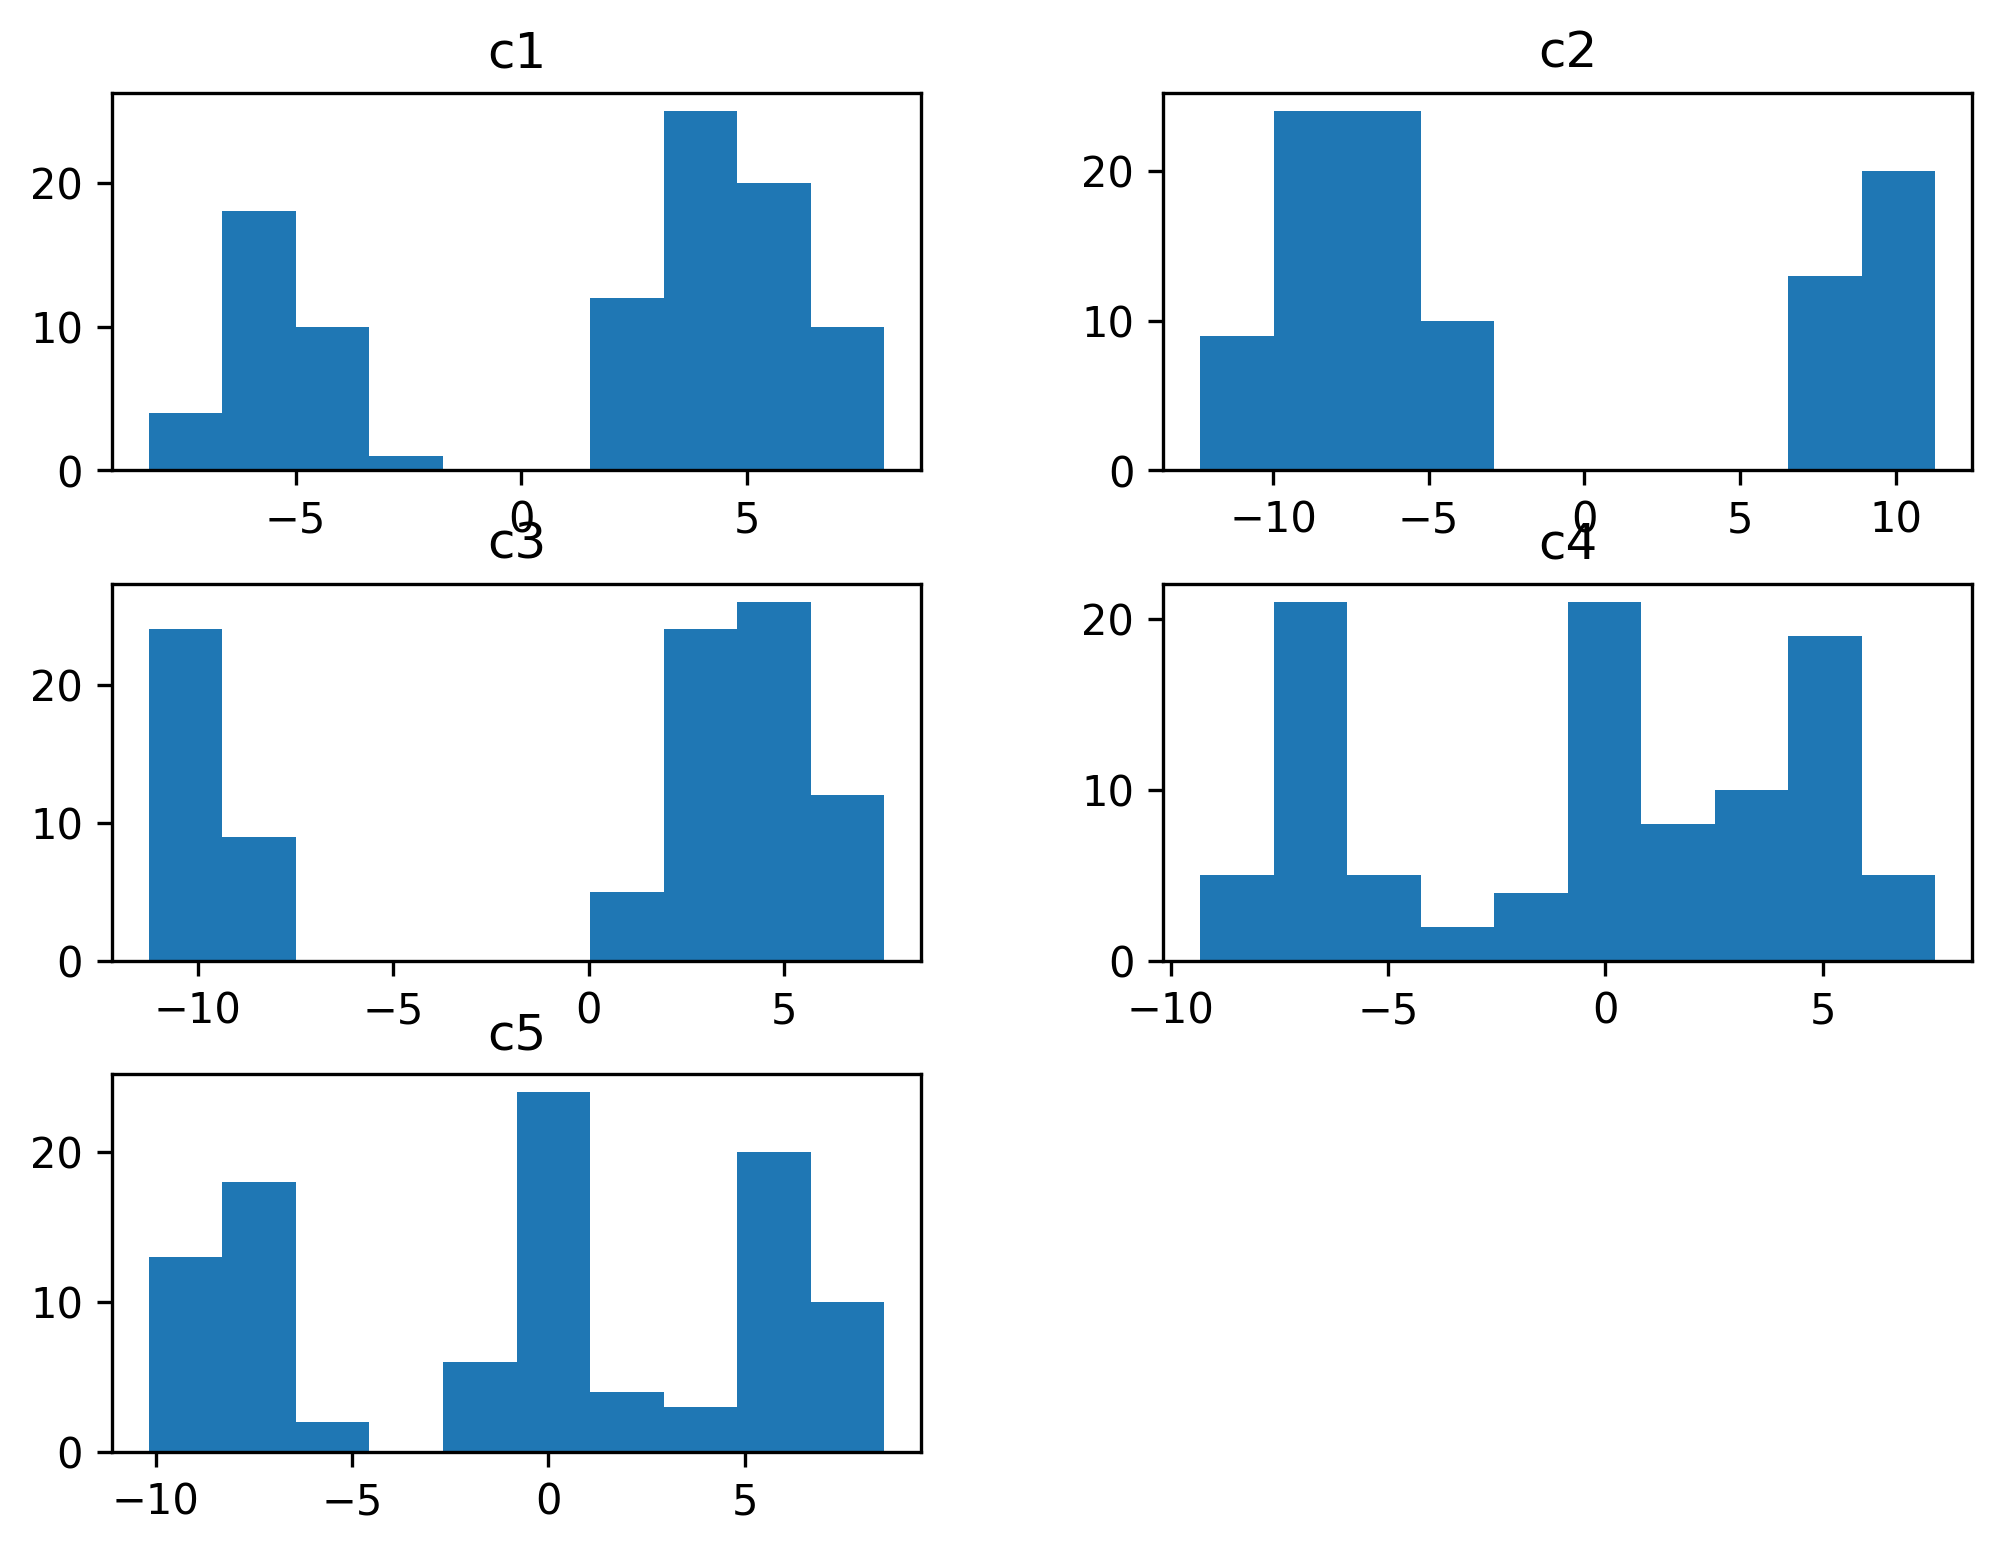

In [5]:
data.hist(bins = 10, figsize = (8,6), grid = False)
plt.show()

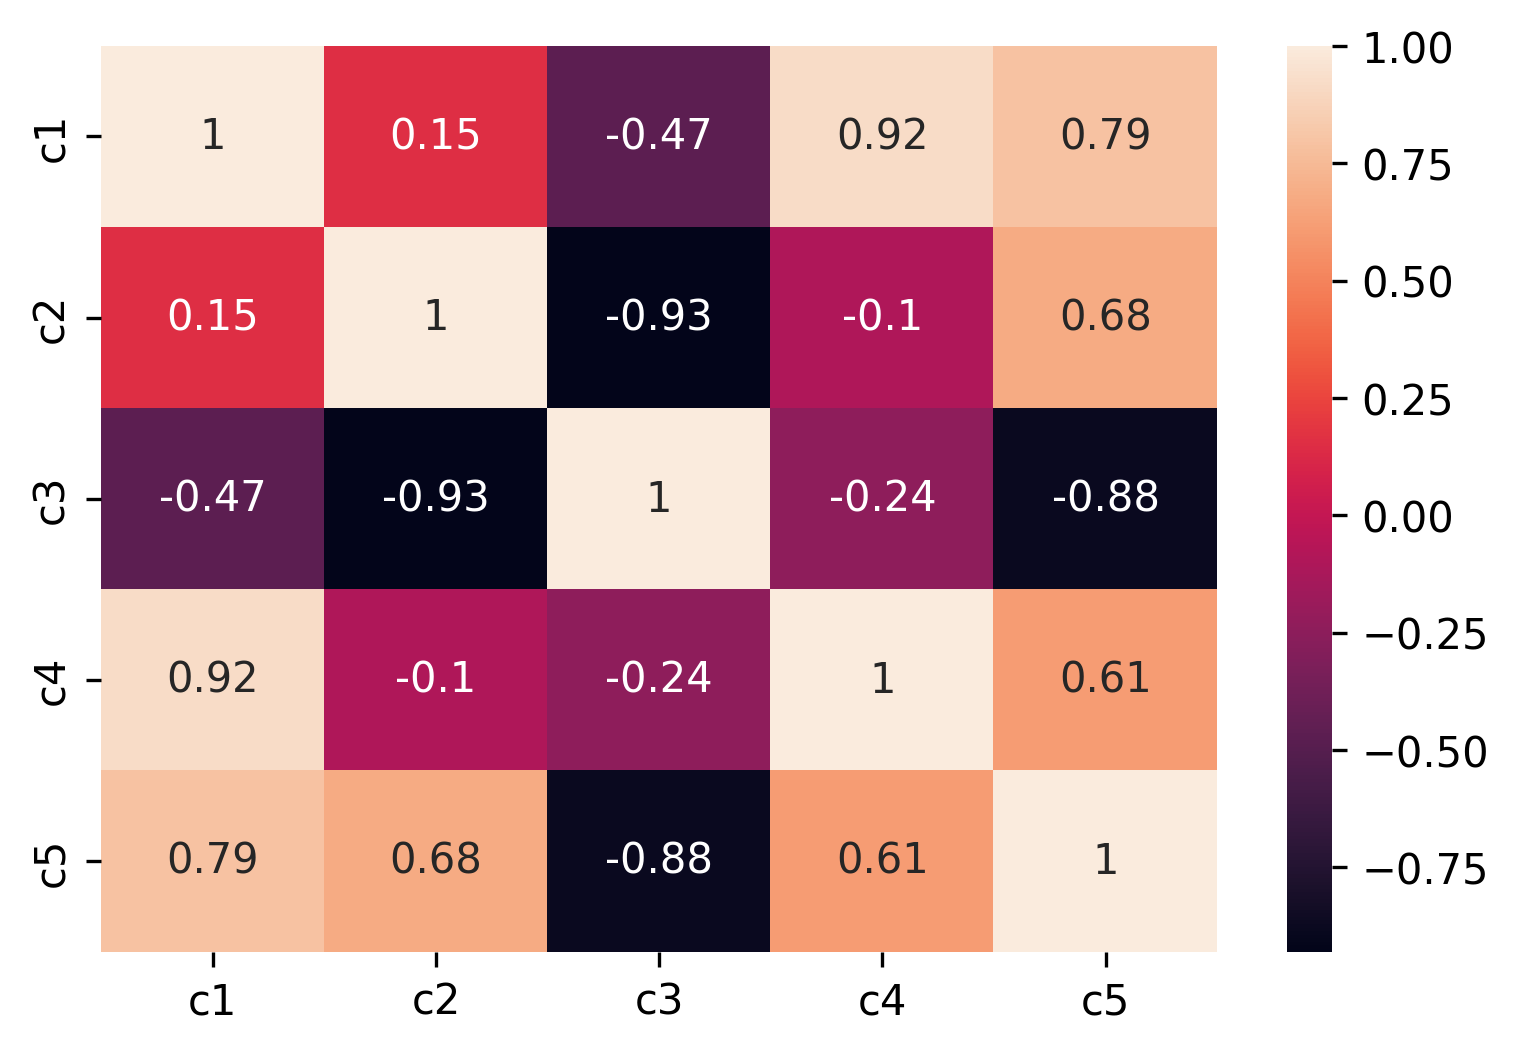

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

**Settin up Pycaret**

In [9]:
cluster = setup(data, session_id = 255)

,Description,Value
0,session_id,255
1,Original Data,"(100, 5)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(100, 5)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

Generating model

In [10]:
model = create_model('dbscan',num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)
INFO:logs:create_model() succesfully completed......................................


Plotting model

In [11]:
plot_model(model, 'cluster')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
